In [2]:
%config Completer.use_jedi = False

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [8]:
df = pd.read_csv('./datalab/CabPrice/cab_rides.csv', nrows=10000)

<IPython.core.display.Javascript object>

In [9]:
df.shape

(10000, 8)

In [12]:
df.dropna(axis=0, inplace=True)

## Feature Engineering 

<dl>
    <dd>1. Numerical and Categorical Data.</dd>
    <dd>2. Duplicate Data.</dd>
    <dd>3. NULL/NA Data.</dd>
    <dd>3. Data Description.</dd>
</dl>

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9040 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          9040 non-null   float64
 1   cab_type          9040 non-null   object 
 2   time_stamp        9040 non-null   int64  
 3   destination       9040 non-null   object 
 4   source            9040 non-null   object 
 5   price             9040 non-null   float64
 6   surge_multiplier  9040 non-null   float64
 7   name              9040 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 635.6+ KB


In [75]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,0,1970-01-01 00:25:44.952607890,7,5,5.0,1.0,7
1,0.44,0,1970-01-01 00:25:43.284023677,7,5,11.0,1.0,2
2,0.44,0,1970-01-01 00:25:43.366822198,7,5,7.0,1.0,5
3,0.44,0,1970-01-01 00:25:43.553582749,7,5,26.0,1.0,4
4,0.44,0,1970-01-01 00:25:43.463360223,7,5,9.0,1.0,6


In [58]:
df.cab_type.value_counts()

Uber    4568
Lyft    4472
Name: cab_type, dtype: int64

In [23]:
df.destination.value_counts()

Northeastern University    892
North End                  880
Fenway                     815
North Station              779
Beacon Hill                772
West End                   757
Boston University          743
South Station              740
Haymarket Square           738
Back Bay                   723
Theatre District           707
Financial District         681
Name: destination, dtype: int64

In [24]:
df.source.value_counts()

North Station              884
Theatre District           854
Back Bay                   830
North End                  790
Fenway                     785
Financial District         778
Haymarket Square           775
West End                   744
South Station              741
Beacon Hill                718
Northeastern University    684
Boston University          644
Name: source, dtype: int64

In [25]:
df.name.value_counts()

Black           781
UberPool        778
Black SUV       776
UberXL          775
UberX           774
WAV             770
Shared          769
Lux Black XL    766
Lux             762
Lyft XL         762
Lyft            757
Lux Black       757
Name: name, dtype: int64

In [26]:
df.surge_multiplier.value_counts()

1.00    8949
1.25     150
1.50      58
1.75      35
2.00      33
2.50       2
Name: surge_multiplier, dtype: int64

In [27]:
df.price.unique()

array([ 5. , 11. ,  7. , 26. ,  9. , 16.5, 10.5,  3. , 27.5, 13.5, 12. ,
       16. ,  7.5,  5.5,  3.5,  8.5, 15. , 20.5, 19.5, 29.5,  9.5, 22. ,
       13. , 17. , 10. , 34. , 18.5, 36. , 22.5, 32.5, 25. , 27. , 35. ,
        8. , 23.5, 14. , 26.5, 38.5, 23. , 30.5, 17.5, 30. , 36.5, 12.5,
       33.5, 21.5, 38. , 18. , 33. , 32. ,  6.5, 11.5, 31.5, 28.5, 24. ,
       29. , 31. , 42.5, 41. , 19. , 52.5, 67.5, 15.5, 21. , 45.5, 28. ,
       37.5, 14.5, 47.5,  4.5, 40.5, 55. , 42. , 46.5, 50.5, 24.5, 41.5,
       56. , 25.5, 39. , 57.5, 20. , 39.5,  6. , 35.5, 48.5, 37. , 45. ,
       44. , 34.5,  2.5, 46. , 48. , 47. , 54. , 52. , 62. , 43. , 43.5])

In [19]:
df.duplicated().sum()

0

In [59]:
df.isna().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
name                0
dtype: int64

In [60]:
df.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
name                0
dtype: int64

In [61]:
df.describe()

,distance,time_stamp,price,surge_multiplier
count,9040.000000,9.040000e+03,9040.000000,9040.000000
mean,2.068718,1.544029e+12,15.997732,1.012113
std,1.008354,6.852931e+08,8.649982,0.084505
min,0.300000,1.543207e+12,2.500000,1.000000
25%,1.250000,1.543439e+12,9.000000,1.000000
50%,2.000000,1.543726e+12,13.500000,1.000000
75%,2.840000,1.544810e+12,22.500000,1.000000
max,4.940000,1.545161e+12,42.500000,2.500000


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='distance', ylabel='price'>

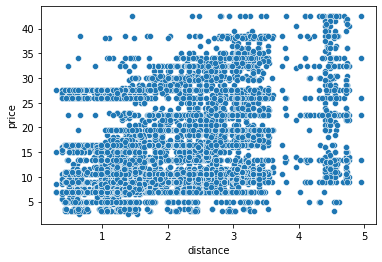

In [54]:
sns.scatterplot(x = df.distance, y=df.price)

In [50]:
def getIQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 *IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

In [53]:
lower_range, upper_range = getIQR(df, 'distance')
print('LR:{}, UR:{}'.format(lower_range, upper_range))
df = df[ (df.distance > lower_range) & (df.distance < upper_range)]

LR:-1.1500000000000004, UR:5.25


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='price', ylabel='Count'>

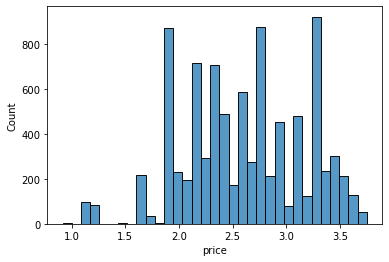

In [65]:
sns.histplot(np.log(df.price))

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='price'>

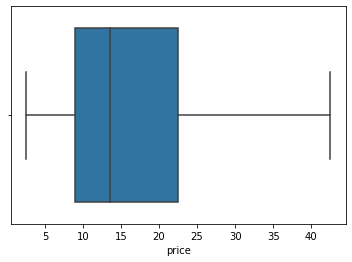

In [63]:
sns.boxplot(df.price)

In [ ]:
sns.set(rc={'figure.figsize':(16.7,12.27)})
sns.heatmap(df.corr(), annot=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9040 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   distance          9040 non-null   float64       
 1   cab_type          9040 non-null   int8          
 2   time_stamp        9040 non-null   datetime64[ns]
 3   destination       9040 non-null   int8          
 4   source            9040 non-null   int8          
 5   price             9040 non-null   float64       
 6   surge_multiplier  9040 non-null   float64       
 7   name              9040 non-null   int8          
 8   date              9040 non-null   object        
dtypes: datetime64[ns](1), float64(3), int8(4), object(1)
memory usage: 459.1+ KB


In [82]:
df.head()

,distance,cab_type,destination,source,price,surge_multiplier,name
0,0.44,0,7,5,5.0,1.0,7
1,0.44,0,7,5,11.0,1.0,2
2,0.44,0,7,5,7.0,1.0,5
3,0.44,0,7,5,26.0,1.0,4
4,0.44,0,7,5,9.0,1.0,6


In [74]:
df.time_stamp = pd.to_datetime(df.time_stamp)

<IPython.core.display.Javascript object>

In [76]:
df['date'] = df.time_stamp.dt.date

In [81]:
df.drop(columns=['time_stamp','date'], axis=1, inplace=True)

In [ ]:
df['date'] = df.time_stamp.dt.date

In [71]:
df.cab_type    = pd.Categorical(df.cab_type).codes
df.destination = pd.Categorical(df.destination).codes
df.source      = pd.Categorical(df.source).codes
df.name        = pd.Categorical(df.name).codes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

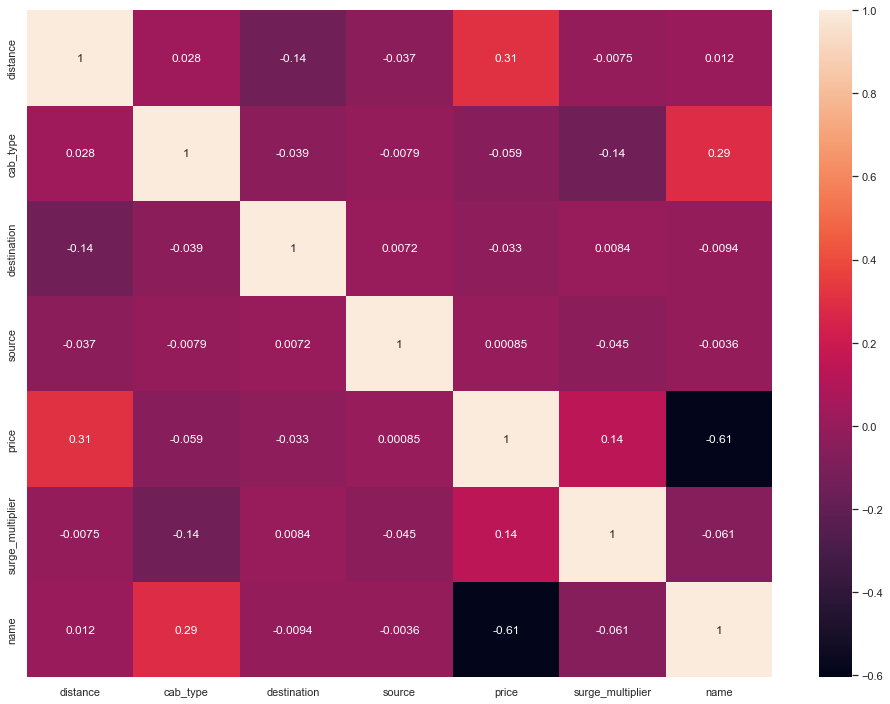

In [83]:
sns.set(rc={'figure.figsize':(16.7,12.27)})
sns.heatmap(df.corr(), annot=True)

In [91]:
from sklearn.pipeline import Pipeline

In [88]:
from sklearn.metrics import mean_squared_log_error,r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [86]:
import joblib
from sklearn.decomposition import PCA

In [98]:
from sklearn.model_selection import train_test_split

In [100]:
X = df.drop(['price'], axis=1).values
Y = df['price'].values

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [119]:
print('X_train:{}, X_test:{}'.format(X_train.shape, X_test.shape))

X_train:(7232, 6), X_test:(1808, 6)


In [126]:
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1',PCA(n_components=3)),
    ('lr_regression',LinearRegression())
])

pipeline1 = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1',PCA(n_components=3)),
    ('dt_regression',DecisionTreeRegressor())
])

pipeline2 = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1',PCA(n_components=3)),
    ('rf_regression',RandomForestRegressor())
])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
pipelines = [pipeline, pipeline1, pipeline2]

In [128]:
for pipe in pipelines:
	print(pipe.steps)

[('scaler1', StandardScaler()), ('pca1', PCA(n_components=3)), ('lr_regression', LinearRegression())]
[('scaler1', StandardScaler()), ('pca1', PCA(n_components=3)), ('dt_regression', DecisionTreeRegressor())]
[('scaler1', StandardScaler()), ('pca1', PCA(n_components=3)), ('rf_regression', RandomForestRegressor())]


In [129]:
best_accuracy=0.0
best_regressor=0
best_pipeline=""

In [130]:
pipe_dict = {0: 'Linear Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [131]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
    print('r2_score of train data is:-',r2_score(y_train,model.predict(X_train)))
    print("mean_squared_log Train Error is ",np.sqrt(mean_squared_log_error(np.round(y_train),np.round(model.predict(X_train)))))
    print('*'*60)
    print()

Linear Regression Test Accuracy: 0.22373028387616223
r2_score of train data is:- 0.24913258178457665
mean_squared_log Train Error is  0.46963357338834744
************************************************************

Decision Tree Test Accuracy: 0.8903697588110918
r2_score of train data is:- 0.9861592844356446
mean_squared_log Train Error is  0.07516102248985085
************************************************************

RandomForest Test Accuracy: 0.9257580073218004
r2_score of train data is:- 0.9782191834161662
mean_squared_log Train Error is  0.09192922546031083
************************************************************

